In [354]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
df=pd.read_excel("C:/Users/ASUS/Downloads/Attrition Case Study.xlsx")

In [355]:
df.drop(labels=["EmployeeCount", "StandardHours", "Over18", "EmployeeNumber"],axis=1,inplace=True)

df["Attrition"]=df["Attrition"].astype("category")

In [356]:
def catcon(df):
    cat=[]
    con=[]
    for i in df.columns:
        if df[i].dtypes == "object":
            cat.append(i)
        else:
            con.append(i)
    return cat,con

In [357]:
cat,con=catcon(df)

# Logistic Regression

C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7653061224489796
[[208  35]
 [ 34  17]]
Precision for Logistic Regression is:  0.3269230769230769
AUC for Logistic Regression:  0.7362220608407972


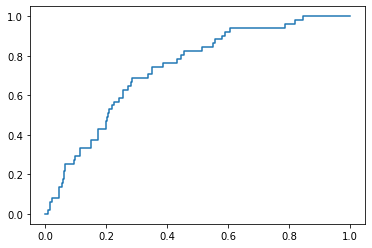

In [400]:
X=df[[ 'Age','BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany',
       'YearsSinceLastPromotion']]
Y=df[["Attrition"]]
X=pd.get_dummies(X)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=20)
from imblearn.over_sampling import SMOTE, ADASYN
#X_resampled, y_resampled = SMOTE().fit_resample(xtrain, ytrain)
#print(sorted(Counter(y_resampled).items()))
sm=SMOTE(sampling_strategy=1,k_neighbors=5,random_state=1)
x_resampled,y_resampled=sm.fit_sample(xtrain,ytrain)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_model=lr.fit(x_resampled,y_resampled)
pred= lr_model.predict(xtest)
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score
import sklearn.metrics as m
print(accuracy_score(ytest,pred))
print(confusion_matrix(ytest,pred))
precision = precision_score(ytest, pred, average='binary')
print("Precision for Logistic Regression is: ", precision)
probs=lr_model.predict_proba(xtest)
preds=probs[:,1]
fpr,tpr,threshold=m.roc_curve(ytest,preds)
plt.plot(fpr,tpr)
roc_auc=m.auc(fpr,tpr)
print("AUC for Logistic Regression: ", roc_auc)

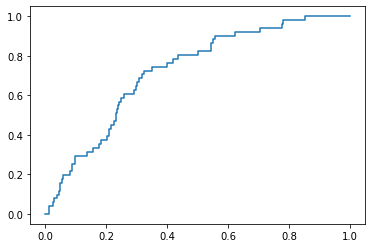

In [359]:
plt.plot(fpr,tpr)

In [149]:
roc_auc


0.7236343096909545

## KNN

In [111]:
y_resampled["Attrition"].value_counts()x

1    990
0    990
Name: Attrition, dtype: int64

In [150]:
df.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_se

C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_se

C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_se

The accuracy score for KNN mode is : 0.8061224489795918
Precision for KNN is:  0.4444444444444444
AUC for KNN :  0.6856693294601792


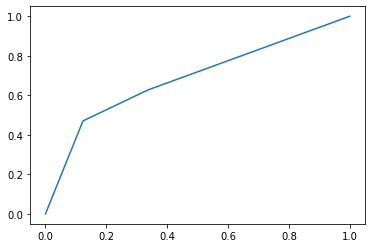

In [395]:
X=df[['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany']]
X=pd.get_dummies(X)
Y=df[["Attrition"]]
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=pd.DataFrame(ss.fit_transform(X),columns=X.columns)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=20)
from imblearn.over_sampling import SMOTE, ADASYN
#X_resampled, y_resampled = SMOTE().fit_resample(xtrain, ytrain)
#print(sorted(Counter(y_resampled).items()))
sm=SMOTE(sampling_strategy=1,k_neighbors=5,random_state=1)
x_resampled,y_resampled=sm.fit_sample(xtrain,ytrain)
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
tp={"n_neighbors":range(2,20,1)}
cv=GridSearchCV(knn,tp,scoring="accuracy",cv=4)
cvmodel=cv.fit(x_resampled,y_resampled)
x=cvmodel.best_params_["n_neighbors"]
KNN=KNeighborsClassifier(n_neighbors=x)
knn_model=KNN.fit(x_resampled,y_resampled)
pred=knn_model.predict(xtest)
from sklearn.metrics import accuracy_score
print("The accuracy score for KNN mode is :",accuracy_score(ytest,pred))
precision = precision_score(ytest, pred, average='binary')
print("Precision for KNN is: ", precision)
probs=knn_model.predict_proba(xtest)
preds=probs[:,1]
fpr,tpr,threshold=m.roc_curve(ytest,preds)
plt.plot(fpr,tpr)
roc_auc=m.auc(fpr,tpr)
print("AUC for KNN : ", roc_auc)


In [396]:
x

2

# Decision Tree

In [197]:
df.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

The accuracy score for Decision Tree model is : 0.8129251700680272
Precision for Decision Tree is:  0.4642857142857143
AUC for KNN :  0.6931735657225853


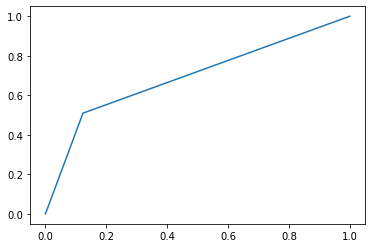

In [397]:
X=df[['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']]
X=pd.get_dummies(X)
Y=df[["Attrition"]]
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=pd.DataFrame(ss.fit_transform(X),columns=X.columns)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=20)
from imblearn.over_sampling import SMOTE, ADASYN
#X_resampled, y_resampled = SMOTE().fit_resample(xtrain, ytrain)
#print(sorted(Counter(y_resampled).items()))
sm=SMOTE(sampling_strategy=1,k_neighbors=5,random_state=1)
x_resampled,y_resampled=sm.fit_sample(xtrain,ytrain)
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="entropy",random_state=20)
model_dtc=dtc.fit(x_resampled,y_resampled)
pred=model_dtc.predict(xtest)
print("The accuracy score for Decision Tree model is :", accuracy_score(ytest,pred))
precision = precision_score(ytest, pred, average='binary')
print("Precision for Decision Tree is: ", precision)
probs=model_dtc.predict_proba(xtest)
preds=probs[:,1]
fpr,tpr,threshold=m.roc_curve(ytest,preds)
plt.plot(fpr,tpr)
roc_auc=m.auc(fpr,tpr)
print("AUC for KNN : ", roc_auc)


# Pruning

The accuracy score after pruning using max depth is : 0.8027210884353742
Precision for maxdepth is:  0.4426229508196721
AUC for Max dept :  0.6794157992415072


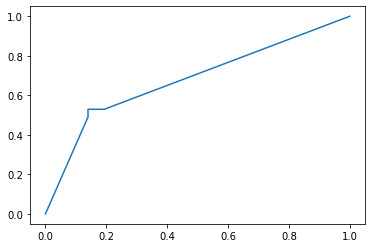

In [398]:
X=df[['Age', 'BusinessTravel', 'DailyRate', 'Department', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']]
X=pd.get_dummies(X)
Y=df[["Attrition"]]
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=pd.DataFrame(ss.fit_transform(X),columns=X.columns)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=20)
from imblearn.over_sampling import SMOTE, ADASYN
#X_resampled, y_resampled = SMOTE().fit_resample(xtrain, ytrain)
#print(sorted(Counter(y_resampled).items()))
sm=SMOTE(sampling_strategy=1,k_neighbors=5,random_state=1)
x_resampled,y_resampled=sm.fit_sample(xtrain,ytrain)
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="entropy",random_state=20)
from sklearn.model_selection import GridSearchCV
tp={"max_depth":range(2,20,1)}
cv=GridSearchCV(dtc,tp,scoring="accuracy",cv=4)
cvmodel=cv.fit(x_resampled,y_resampled)
md=cvmodel.best_params_["max_depth"]
dtc1=DecisionTreeClassifier(criterion="entropy",random_state=20,max_depth=md)
dtc_max=dtc1.fit(x_resampled,y_resampled)
pred=dtc_max.predict(xtest)
from sklearn.metrics import accuracy_score
print("The accuracy score after pruning using max depth is :",accuracy_score(ytest,pred))
precision = precision_score(ytest, pred, average='binary')
print("Precision for maxdepth is: ", precision)
probs=dtc_max.predict_proba(xtest)
preds=probs[:,1]
fpr,tpr,threshold=m.roc_curve(ytest,preds)
plt.plot(fpr,tpr)
roc_auc=m.auc(fpr,tpr)
print("AUC for Max dept : ", roc_auc)


# Min Leaf

The accuracy score after pruning using min samples leaf is : 0.8095238095238095
Precision for Min Leaf is:  0.4418604651162791
AUC for min Leaf :  0.7004357298474946


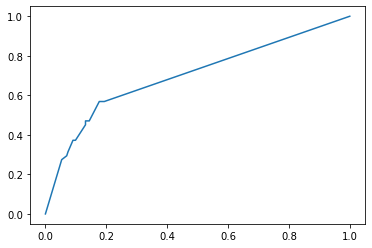

In [399]:
X=df[['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion']]
X=pd.get_dummies(X)
Y=df[["Attrition"]]
from sklearn.preprocessing import StandardScaler
#ss=StandardScaler()
#X=pd.DataFrame(ss.fit_transform(X),columns=X.columns)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=20)
from imblearn.over_sampling import SMOTE, ADASYN
#X_resampled, y_resampled = SMOTE().fit_resample(xtrain, ytrain)
#print(sorted(Counter(y_resampled).items()))
sm=SMOTE(sampling_strategy=1,k_neighbors=5,random_state=1)
x_resampled,y_resampled=sm.fit_sample(xtrain,ytrain)
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="entropy",random_state=20)
from sklearn.model_selection import GridSearchCV
tp = {"min_samples_leaf":range(2,20,1)}
cv = GridSearchCV(dtc,tp,scoring="accuracy",cv=4)
cvmodel = cv.fit(x_resampled,y_resampled)
md=cvmodel.best_params_["min_samples_leaf"]
dtc2=DecisionTreeClassifier(criterion="entropy",random_state=20,min_samples_leaf=md)
dtc_minleaf=dtc2.fit(x_resampled,y_resampled)
pred=dtc_minleaf.predict(xtest)
print("The accuracy score after pruning using min samples leaf is :",accuracy_score(ytest,pred))
precision = precision_score(ytest, pred, average='binary')
print("Precision for Min Leaf is: ", precision)
probs=dtc_minleaf.predict_proba(xtest)
preds=probs[:,1]
fpr,tpr,threshold=m.roc_curve(ytest,preds)
plt.plot(fpr,tpr)
roc_auc=m.auc(fpr,tpr)
print("AUC for min Leaf : ", roc_auc)

In [269]:
df.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# Random Forest

C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selec

C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selec

C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selec

0.8809523809523809
Precision for Random Forest is:  0.8333333333333334
AUC:  0.8061809085774226


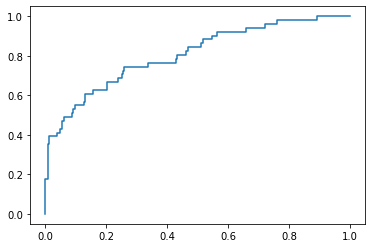

In [391]:
X=df[['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion']]
Y=df[["Attrition"]]
X=pd.get_dummies(X)
from sklearn.preprocessing import StandardScaler
#ss=StandardScaler()
#X=pd.DataFrame(ss.fit_transform(X),columns=X.columns)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=20)
from imblearn.over_sampling import SMOTE, ADASYN
#X_resampled, y_resampled = SMOTE().fit_resample(xtrain, ytrain)
#print(sorted(Counter(y_resampled).items()))
sm=SMOTE(sampling_strategy=1,k_neighbors=5,random_state=1)
x_resampled,y_resampled=sm.fit_sample(xtrain,ytrain)
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion="entropy",random_state=20)
from sklearn.model_selection import GridSearchCV
tp={"max_depth":range(2,20,1)}
cv=GridSearchCV(rf,tp,scoring="accuracy",cv=4)
cvmodel=cv.fit(x_resampled,y_resampled)
md=cvmodel.best_params_["max_depth"]
rf1=RandomForestClassifier(criterion="entropy",random_state=20,max_depth=md)
rf_model=rf1.fit(x_resampled,y_resampled)
pred=rf_model.predict(xtest)
from sklearn.metrics import accuracy_score,roc_auc_score
print(accuracy_score(ytest,pred))
precision = precision_score(ytest, pred, average='binary')
print("Precision for Random Forest is: ", precision)
probs=rf_model.predict_proba(xtest)
preds=probs[:,1]
fpr,tpr,threshold=m.roc_curve(ytest,preds)
plt.plot(fpr,tpr)
roc_auc=m.auc(fpr,tpr)
print("AUC for random forest: ", roc_auc)
